In [1]:
import ps_utils
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la

/Users/mlc/Library/CloudStorage/OneDrive-Personal/Københavns_Universitet/7_Semester/Vision_and_Image_Processing/group-assignments/vision-image-processing/Assignment-3/DataAndCodeAssignment3/ps_utils.py:410: SyntaxWarning: invalid escape sequence '\i'
  """


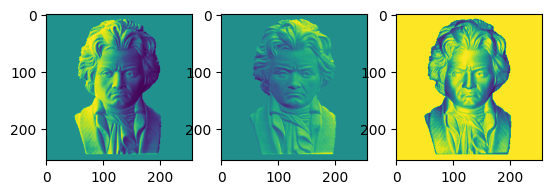

/Users/mlc/Library/CloudStorage/OneDrive-Personal/Københavns_Universitet/7_Semester/Vision_and_Image_Processing/group-assignments/vision-image-processing/Assignment-3/DataAndCodeAssignment3/ps_utils.py:410: SyntaxWarning: invalid escape sequence '\i'
  """


TypeError: FigureBase.gca() got an unexpected keyword argument 'projection'

<Figure size 640x480 with 0 Axes>

In [2]:
# read Beethoven data
I, mask, S = ps_utils.read_data_file('Beethoven4')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# for each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]


# solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))
n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)
plt.imshow(mask)

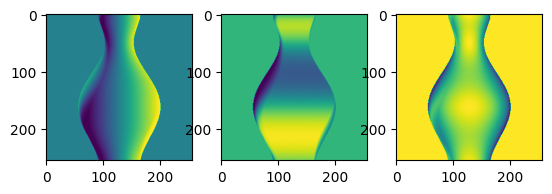

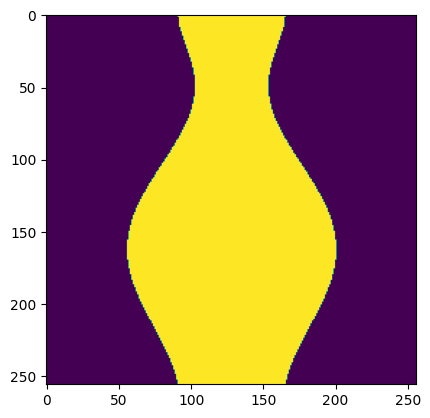

In [4]:
# read Beethoven data
I, mask, S = ps_utils.read_data_file('mat_vase')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# for each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]


# solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))
n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)
plt.imshow(mask)

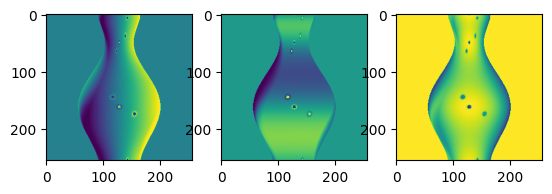

In [ ]:
# read Beethoven data
I, mask, S = ps_utils.read_data_file('shiny_vase')

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape

# for each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]


# solve for M = rho*N
iS = la.inv(S)
M = np.dot(iS, J)

# get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))
n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)
plt.imshow(mask)

In [5]:
import ps_utils
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from scipy.ndimage import gaussian_filter as gaussian_filter

# read Beethoven data
I, mask, S = ps_utils.read_data_file('Buddha')

#print(S.shape)

# get indices of non zero pixels in mask
nz = np.where(mask > 0)
m, n = mask.shape


# for each mask pixel, collect image data
J = np.zeros((3, len(nz[0])))
for i in range(3):
    Ii = I[:, :, i]
    J[i, :] = Ii[nz]
    
print(I.shape)
print(S.shape)
print(J.shape)
    
#J = gaussian_filter(J, sigma=1.0)
#print(J.min(), J.max())
# solve for M = rho*N
#iS = la.inv(S)
#M = np.dot(iS, J)
M = ps_utils.ransac_3dvector((J, S), 26.0)

#get albedo as norm of M and normalize M
Rho = la.norm(M, axis=0)
N = M/np.tile(Rho, (3, 1))

n1 = np.zeros((m, n))
n2 = np.zeros((m, n))
n3 = np.ones((m, n))
n1[nz] = N[0, :]
n2[nz] = N[1, :]
n3[nz] = N[2, :]

_, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(n1)
ax2.imshow(n2)
ax3.imshow(n3)
plt.show()

z = ps_utils.unbiased_integrate(n1, n2, n3, mask)
ps_utils.display_surface(z)

(433, 650, 10)
(10, 3)
(10, 49872)
ransac_3dvector(): at trial  0
ransac_3dvector(): selected indices =  [4, 9, 6]
ransac_3dvector(): estimated model [[ 14.19990552  -5.88583471  29.520052   ...  29.50794252  44.57849839
   14.2301792 ]
 [-31.99128488 -22.16956037 -42.43931177 ... -46.67308577 -47.13427989
  -21.40684987]
 [ 14.03447462  30.68485448   4.38071359 ...   8.75875497   3.46146996
    3.08937115]]
ransac_3dvector(): number of inliers for this model 220384


MemoryError: Unable to allocate 81.9 GiB for an array with shape (220384, 49872) and data type float64